**Step 0: Load the needed libraries:**

In [12]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Step 1 and 2: Download the dataset and display some information about it.

In [13]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Step 3: Find the maximum, minimum, mean and
std's values for each variable:

In [25]:
print("Maximum: ", np.max(X, axis=0))
print("Minimum: ", np.min(X, axis=0))
print("Mean: ", np.mean(X, axis=0))
print("Standard Deviation: ", np.std(X, axis=0))

Maximum:  [7.9 4.4 6.9 2.5]
Minimum:  [4.3 2.  1.  0.1]
Mean:  [5.84 3.06 3.76 1.2 ]
Standard Deviation:  [0.83 0.43 1.76 0.76]


Step 4: Counting samples for each species:

In [16]:
for value in np.unique(Y):
  print("Number of occurrences of", iris.target_names[value] + ":", np.count_nonzero(Y==value))

Number of occurrences of setosa: 50
Number of occurrences of versicolor: 50
Number of occurrences of virginica: 50


Step 5: Max, Min, Mean, STD's for each iris class:

In [17]:
for target in np.unique(Y):
  print("data for", iris.target_names[target] + ":")
  print("max:", np.max(X[Y==target], axis=0))
  print("min:", np.min(X[Y==target], axis=0))
  print("mean:", np.mean(X[Y==target], axis=0))
  print("std:", np.std(X[Y==target], axis=0))

data for setosa:
max: [5.8 4.4 1.9 0.6]
min: [4.3 2.3 1.  0.1]
mean: [5.006 3.428 1.462 0.246]
std: [0.34894699 0.37525458 0.17191859 0.10432641]
data for versicolor:
max: [7.  3.4 5.1 1.8]
min: [4.9 2.  3.  1. ]
mean: [5.936 2.77  4.26  1.326]
std: [0.51098337 0.31064449 0.46518813 0.19576517]
data for virginica:
max: [7.9 3.8 6.9 2.5]
min: [4.9 2.2 4.5 1.4]
mean: [6.588 2.974 5.552 2.026]
std: [0.62948868 0.31925538 0.54634787 0.27188968]


Step 6: checking the boxplot view:

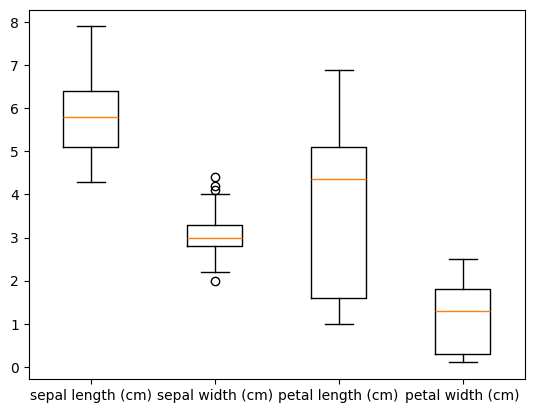

In [18]:
fig, ax = plt.subplots()
ax.boxplot(X, labels=iris.feature_names)
plt.show()

It clearly indicates some outliers on the Sepal Width variable

Step 7: Finding averages per class and comparing with overall average

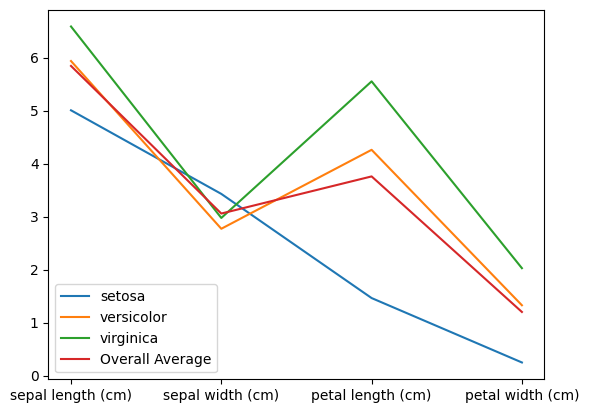

In [19]:
# calculating the overall average of each feature
overall_average = np.mean(X, axis=0)

# now, the average of each feature for each class
class_averages = np.zeros((3, 4))
for i in range(3):
  class_averages[i, :] = np.mean(X[Y == i], axis=0)

# Plot the overall average and class averages for each feature
fig, ax = plt.subplots()

for i in range(3):
  ax.plot(class_averages[i, :],label=iris.target_names[i])
ax.plot(overall_average, label='Overall Average')

ax.set_xticks(range(4))
ax.set_xticklabels(iris.feature_names)
ax.legend()
plt.show()

Step 8: Plotting the heatmap to see possible correlations:

<Axes: >

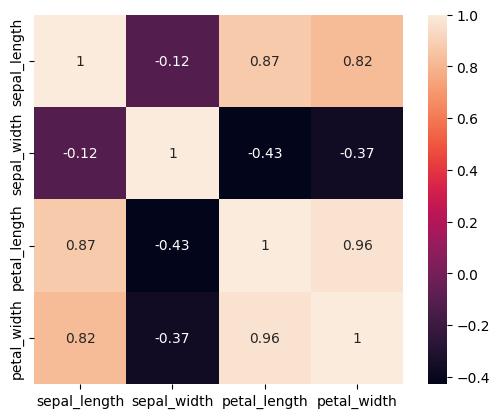

In [23]:
import seaborn as sns

# so the results have at most 2 decimal precision
np.set_printoptions(precision=2)

irisns = sns.load_dataset("iris")
corr = irisns.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, square=True)